## Transfer learning tuning and saving best models:

### VGG16:
 * model parameter and other information can be found below:
     * [source](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
     
  * base_model: use vgg16 as base model and freeze at bottleneck layer (stop right before flatten layer). 
  * top_model: tune dense layers (parameters are inspired by the blog source):
     * batch_size 16 seems to work best for small data set 
  * freezed the first 15 layers and fined tuned the last 5 layers (block5 and fully connected layer).
  * extra blog source for callbacks and saving models:
    * [call_backs for best weights](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)
    * [saving models](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

### ResNet50:
  * Use Resnet50 to help further improve accuracy:
      * see [base model info comparison](https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
      * [resnet50 blog](https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33)
     
  * base_model: use RESNET50 and freeze at bottleneck layer (stop right before 2D AVERAGE POOL). 
  * top_model: tune dense layers (parameters are inspired by a few sources):
     * [source1](https://www.kaggle.com/suniliitb96/tutorial-keras-transfer-learning-with-resnet50)
     * [source2](https://www.kaggle.com/pmigdal/transfer-learning-with-resnet-50-in-keras)
     * [source3](https://towardsdatascience.com/transfer-learning-for-image-classification-using-keras-c47ccf09c8c8)
  * unfreezed the last 5 layers (after activation48 and fully connected layer).
  
---
#### This cell is required in order to use GPU for running the model 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# dynamically grow the memory used on the GPU
config.gpu_options.allow_growth = True 
# to log device placement (on which device the operation ran)
# (nothing gets printed in Jupyter, only if you run it standalone)
config.log_device_placement = True  
# set this TensorFlow session as the default session for Keras                                    
sess = tf.Session(config=config)
set_session(sess) 
keras.backend.get_session().run(tf.global_variables_initializer())  

Using TensorFlow backend.
W0908 20:27:22.756683 140299869275968 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0908 20:27:22.757494 140299869275968 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:207: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



---
#### Import necessary libraries:

In [2]:
import sys
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16
%matplotlib inline

#### Load in python files with helper functions:

In [3]:
%load_ext autoreload
%autoreload 1

sys.path.append("../python_files/")

import vgg16_preprocess
import model_tuning
import model_evaluation


%aimport vgg16_preprocess
%aimport model_tuning
%aimport model_evaluation

----
#### Train VGG16 models, save the best weights and show results
* set file_paths and preprocess functions for hat, beard, and eyewear:

In [14]:
file_path1_hat = '../tuning_data/VGG_16_tuning/bottleneck_train_hat.npy'
file_path2_hat = '../tuning_data/VGG_16_tuning/bottleneck_test_hat.npy'
file_path3_hat = '../tuning_data/VGG_16_tuning/top_model_weights_hat.h5'
file_path4_hat = '../tuning_data/VGG_16_tuning/best_vgg16_model_hat.h5'
file_path1_beard = '../tuning_data/VGG_16_tuning/bottleneck_train_beard.npy'
file_path2_beard = '../tuning_data/VGG_16_tuning/bottleneck_test_beard.npy'
file_path3_beard = '../tuning_data/VGG_16_tuning/top_model_weights_beard.h5'
file_path4_beard = '../tuning_data/VGG_16_tuning/best_vgg16_model_beard.h5'
file_path1_eyewear = '../tuning_data/VGG_16_tuning/bottleneck_train_eyewear.npy'
file_path2_eyewear = '../tuning_data/VGG_16_tuning/bottleneck_test_eyewear.npy'
file_path3_eyewear = '../tuning_data/VGG_16_tuning/top_model_weights_eyewear.h5'
file_path4_eyewear = '../tuning_data/VGG_16_tuning/best_vgg16_model_eyewear.h5'
process_func_v = vgg16_preprocess.preprocess_input
vgg16_model_path = '../tuning_data/VGG_16_tuning/vgg_model.json'
pickle_file_path = '../pickle_files/pic_df.pkl'

* save and create test and train df for hat, beard, and eyewear for vgg16:

In [5]:
train_df_hat_v, test_df_hat_v  = model_tuning.save_bottleneck_features('hat',VGG16,process_func_v,1./255,(150,150),
                                                                       file_path1_hat, file_path2_hat)
train_df_beard_v, test_df_beard_v  = model_tuning.save_bottleneck_features('beard',VGG16,process_func_v,1./255,
                                                                           (150,150), file_path1_beard,
                                                                           file_path2_beard)
train_df_eyewear_v, test_df_eyewear_v  = model_tuning.save_bottleneck_features('eyewear',VGG16,process_func_v,
                                                                               1./255,(150,150),
                                                                               file_path1_eyewear,
                                                                               file_path2_eyewear)

* quickly train top models and save best weights for model fine tuning:

In [6]:
# hat
print('Tuning vgg16 hat:')
model_tuning.train_top_model(train_df_hat_v, test_df_hat_v,50, 'hat', 'vgg16',
                             1./255, process_func_v, (150,150),
                             file_path1_hat,file_path2_hat, file_path3_hat)
# beard
print('\n\nTuning vgg16 beard:')
model_tuning.train_top_model(train_df_beard_v,test_df_beard_v,50, 'beard', 'vgg16',
                             1./255, process_func_v, (150,150),
                             file_path1_beard, file_path2_beard, file_path3_beard)
# eyewear
print('\n\nTuning vgg16 eyewear:')
model_tuning.train_top_model(train_df_eyewear_v,test_df_eyewear_v, 50, 'eyewear','vgg16',
                             1./2255, process_func_v, (150,150),
                             file_path1_eyewear, file_path2_eyewear, file_path3_eyewear)

* fine tune models and save best weights for final model

In [7]:
# hat
print('Tuning vgg16 hat:')
model_result_hat = model_tuning.fine_tune_model(train_df_hat_v,test_df_hat_v,50,'hat','vgg16',
                                150,1./255,process_func_v,file_path3_hat, file_path4_hat)
# beard
print('\n\nTuning vgg16 beard:')
model_result_beard = model_tuning.fine_tune_model(train_df_beard_v,test_df_beard_v,50,'beard','vgg16',
                                150,1./255,process_func_v,file_path3_beard, file_path4_beard)
# eyewear
print('\n\nTuning vgg16 eyewear:')
model_result_eyewear = model_tuning.fine_tune_model(train_df_eyewear_v,test_df_eyewear_v,50,'eyewear','vgg16',
                                150,1./255,process_func_v,file_path3_eyewear, file_path4_eyewear)

* save model, we only need to save one model as they are the same model architecture:

In [8]:
model_evaluation.save_model(model_result_hat, vgg16_model_path)

* plot model accuracy and loss curves with each epoch:

In [13]:
# hat
print('Check vgg16 hat model result:')
model_evaluation.plot_model_result(model_result_hat)
# beard
print('\n\n Check vgg16 beard model result:')
model_evaluation.plot_model_result(model_result_beard)
# eyewear
print('\n\n Check vgg16 eyewear model result:')
model_evaluation.plot_model_result(model_result_eyewear)

* test model on entire pic_df

vgg16 hat model evaluation:


W0908 20:37:46.435916 140299869275968 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0908 20:37:46.440665 140299869275968 deprecation.py:323] From /home/mindy/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 653 validated image filenames belonging to 2 classes.


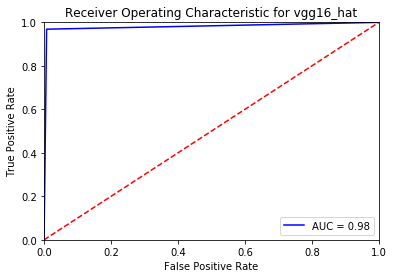

        Pred_0  Pred_1
True_0     395       3
True_1       8     247
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       398
           1       0.99      0.97      0.98       255

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653



vgg16 beard model evaluation:
Found 653 validated image filenames belonging to 2 classes.


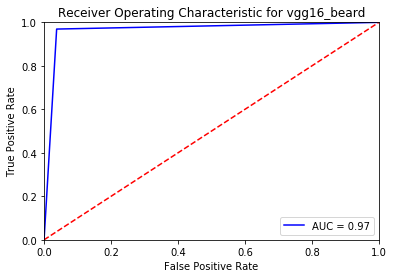

        Pred_0  Pred_1
True_0     410      16
True_1       7     220
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       426
           1       0.93      0.97      0.95       227

    accuracy                           0.96       653
   macro avg       0.96      0.97      0.96       653
weighted avg       0.97      0.96      0.96       653



vgg16 eyewear model evaluation:
Found 653 validated image filenames belonging to 2 classes.


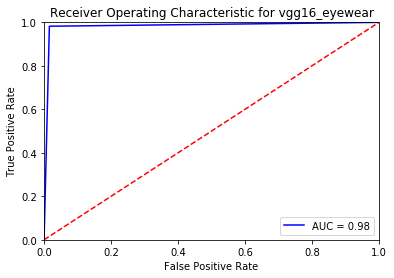

        Pred_0  Pred_1
True_0     311       5
True_1       6     331
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       316
           1       0.99      0.98      0.98       337

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653



In [15]:
 # hat
print('vgg16 hat model evaluation:')
model_evaluation.model_testing(pickle_file_path,'hat',vgg16_model_path,file_path4_hat,
                              (150,150),1./255,process_func_v, 'vgg16')
# beard
print('\n\nvgg16 beard model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'beard', vgg16_model_path, file_path4_beard,
                              (150,150),1./255, process_func_v, 'vgg16')
# eyewear
print('\n\nvgg16 eyewear model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'eyewear', vgg16_model_path, file_path4_eyewear,
                              (150,150),1./255, process_func_v, 'vgg16')

----
#### Train resnet50 models, save the best weights and show results:
* set file_paths for hat, beard, and eyewear:

In [16]:
# set file_pathsand preprocess functions for hat, beard, and eyewear
file_path1_hat = '../tuning_data/resnet_data/bottleneck_train_hat.npy'
file_path2_hat = '../tuning_data/resnet_data/bottleneck_test_hat.npy'
file_path3_hat = '../tuning_data/resnet_data/top_model_weights_hat.h5'
file_path4_hat = '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_hat.h5'
file_path1_beard = '../tuning_data/resnet_data/bottleneck_train_beard.npy'
file_path2_beard = '../tuning_data/resnet_data/bottleneck_test_beard.npy'
file_path3_beard = '../tuning_data/resnet_data/top_model_weights_beard.h5'
file_path4_beard = '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_beard.h5'
file_path1_eyewear = '../tuning_data/resnet_data/bottleneck_train_eyewear.npy'
file_path2_eyewear = '../tuning_data/resnet_data/bottleneck_test_eyewear.npy'
file_path3_eyewear = '../tuning_data/resnet_data/top_model_weights_eyewear.h5'
file_path4_eyewear = '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_eyewear.h5'
resnet_model_path = '../tuning_data/resnet_data/resnet50_model_5_up.json'

* save and create test and train df for hat, beard, and eyewear for resnet50:

In [17]:
train_df_hat_r, test_df_hat_r  = model_tuning.save_bottleneck_features('hat',ResNet50,preprocess_input,None,
                                                                       (224,224),file_path1_hat, file_path2_hat)
train_df_beard_r, test_df_beard_r  = model_tuning.save_bottleneck_features('beard',ResNet50,preprocess_input,None,
                                                                           (224,224), file_path1_beard,
                                                                           file_path2_beard)
train_df_eyewear_r, test_df_eyewear_r  = model_tuning.save_bottleneck_features('eyewear',ResNet50,preprocess_input,
                                                                               None,(224,224),
                                                                               file_path1_eyewear,
                                                                               file_path2_eyewear)

* quickly train top models and save best weights for model fine tuning:

In [18]:
# hat
print('Tuning resnet50 hat:')
model_tuning.train_top_model(train_df_hat_r, test_df_hat_r,50, 'hat', 'resnet50',
                             None, preprocess_input,(224,224),
                             file_path1_hat,file_path2_hat, file_path3_hat)
# beard
print('\n\nTuning resnet50 beard:')
model_tuning.train_top_model(train_df_beard_r, test_df_beard_r,50, 'beard', 'resnet50',
                             None, preprocess_input,(224,224),
                             file_path1_beard, file_path2_beard, file_path3_beard)
# eyewear
print('\n\nTuning resnet50 eyewear:')
model_tuning.train_top_model(train_df_eyewear_r,test_df_eyewear_r, 50, 'eyewear','resnet50',
                              None, preprocess_input,(224,224),
                             file_path1_eyewear, file_path2_eyewear, file_path3_eyewear)

* fine tune models and save best weights for final model:

In [19]:
# hat
print('Tuning resnet50 hat:')
model_result_hat = model_tuning.fine_tune_model(train_df_hat_r,test_df_hat_r,50,'hat','resnet50',
                                224,None,preprocess_input,file_path3_hat, file_path4_hat)
# beard
print('\n\nTuning resnet50 beard:')
model_result_beard = model_tuning.fine_tune_model(train_df_beard_r,test_df_beard_r,50,'beard','resnet50',
                                224,None,preprocess_input,file_path3_beard, file_path4_beard)
# eyewear
print('\n\nTuning resnet50 eyewear:')
model_result_eyewear = model_tuning.fine_tune_model(train_df_eyewear_r,test_df_eyewear_r,50,'eyewear','resnet50',
                                224,None,preprocess_input, file_path3_eyewear, file_path4_eyewear)

* save model, we only need to save one model as they are the same model architecture:

In [20]:
model_evaluation.save_model(model_result_hat, resnet_model_path)

* plot model accuracy and loss curves with each epoch:

In [21]:
# hat
print('Check resnet hat model result:')
model_evaluation.plot_model_result(model_result_hat)
# beard
print('\n\n Check resnet beard model result:')
model_evaluation.plot_model_result(model_result_beard)
# eyewear
print('\n\n Check resnet eyewear model result:')
model_evaluation.plot_model_result(model_result_eyewear)

* test model on entire pic_df:

W0908 20:43:35.258756 140299869275968 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



resnet50 hat model evaluation:
Found 653 validated image filenames belonging to 2 classes.


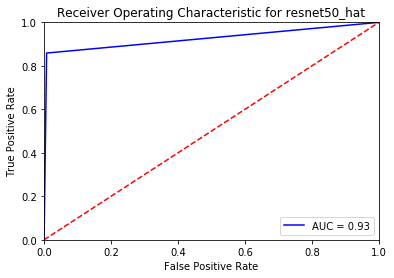

        Pred_0  Pred_1
True_0     395       3
True_1      36     219
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       398
           1       0.99      0.86      0.92       255

    accuracy                           0.94       653
   macro avg       0.95      0.93      0.94       653
weighted avg       0.94      0.94      0.94       653



resnet50 beard model evaluation:
Found 653 validated image filenames belonging to 2 classes.


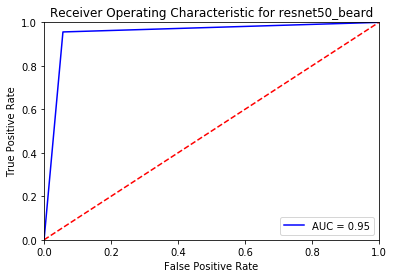

        Pred_0  Pred_1
True_0     402      24
True_1      10     217
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       426
           1       0.90      0.96      0.93       227

    accuracy                           0.95       653
   macro avg       0.94      0.95      0.94       653
weighted avg       0.95      0.95      0.95       653



resnet50 eyewear model evaluation:
Found 653 validated image filenames belonging to 2 classes.


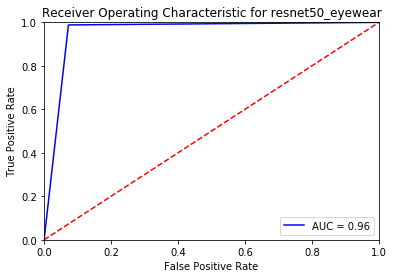

        Pred_0  Pred_1
True_0     293      23
True_1       4     333
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       316
           1       0.94      0.99      0.96       337

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



In [22]:
# hat
print('resnet50 hat model evaluation:')
model_evaluation.model_testing(pickle_file_path,'hat',resnet_model_path,file_path4_hat,
                              (224,224),None,preprocess_input, 'resnet50')
# beard
print('\n\nresnet50 beard model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'beard', resnet_model_path, file_path4_beard,
                              (224,224),None,preprocess_input, 'resnet50')
# eyewear
print('\n\nresnet50 eyewear model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'eyewear', resnet_model_path, file_path4_eyewear,
                              (224,224),None,preprocess_input, 'resnet50')